# Comprehensive Business Data Management and Analysis Using SQL

# Table of Contents

0. [Introduction](#introduction)

1. [Customer Relationship Management (CRM) EDA](#crm-eda)
   - [a. Load and Display Data](#crm-load-display)
   - [b. Interactions per Customer](#crm-interactions)
   - [c. Total Purchase Amount per Customer](#crm-purchase-amount)
   - [d. Scenario 1: Customers with the Most Interactions](#crm-scenario1)
   - [e. Scenario 2: Total Sales Amount per Customer](#crm-scenario2)
   - [f. Scenario 3: Customers Who Have Not Made Any Purchases](#crm-scenario3)
   - [g. Scenario 4: Average Number of Interactions per Customer](#crm-scenario4)
   - [h. Scenario 5: Top 5 Customers by Total Purchase Amount](#crm-scenario5)

2. [Inventory Management EDA](#inventory-eda)
   - [a. Load and Display Data](#inventory-load-display)
   - [b. Stock Levels](#inventory-stock-levels)
   - [c. Total Sales per Product](#inventory-sales-per-product)
   - [d. Scenario 1: Products Low in Stock](#inventory-scenario1)
   - [e. Scenario 2: Total Value of Current Inventory](#inventory-scenario2)
   - [f. Scenario 3: Top 3 Best-Selling Products](#inventory-scenario3)
   - [g. Scenario 4: Products That Have Never Been Sold](#inventory-scenario4)
   - [h. Scenario 5: Total Number of Orders by Status](#inventory-scenario5)

3. [Financial Reporting EDA](#financial-eda)
   - [a. Load and Display Data](#financial-load-display)
   - [b. Revenue vs Expenses](#financial-revenue-expenses)
   - [c. Net Income Over Time](#financial-net-income)
   - [d. Scenario 1: Net Income for Each Month](#financial-scenario1)
   - [e. Scenario 2: Latest Balance Sheet Report](#financial-scenario2)
   - [f. Scenario 3: Month with the Highest Revenue](#financial-scenario3)
   - [g. Scenario 4: Total Cash Inflow and Outflow](#financial-scenario4)
   - [h. Scenario 5: Budgeted vs. Actual Expenses](#financial-scenario5)

4. [Human Resources Management EDA](#hr-eda)
   - [a. Load and Display Data](#hr-load-display)
   - [b. Salary Distribution](#hr-salary-distribution)
   - [c. Performance Ratings](#hr-performance-ratings)
   - [d. Scenario 1: Employees and Their Departments](#hr-scenario1)
   - [e. Scenario 2: Average Salary in Each Department](#hr-scenario2)
   - [f. Scenario 3: Employees with Salaries Above the Company Average](#hr-scenario3)
   - [g. Scenario 4: Employees Who Have Completed Specific Training Programs](#hr-scenario4)
   - [h. Scenario 5: Highest Performance Rating Received by Each Employee](#hr-scenario5)

5. [Website Analytics EDA](#website-eda)
   - [a. Load and Display Data](#website-load-display)
   - [b. Session Duration by Page](#website-session-duration)
   - [c. Bounce Rate by Page](#website-bounce-rate)
   - [d. Scenario 1: Most Visited Pages](#website-scenario1)
   - [e. Scenario 2: Average Session Duration for Each Page](#website-scenario2)
   - [f. Scenario 3: Conversion Rate for Each Marketing Campaign](#website-scenario3)
   - [g. Scenario 4: Bounce Rate for Each Page](#website-scenario4)
   - [h. Scenario 5: Top Referrers Bringing Traffic to the Website](#website-scenario5)



## Introduction

In today's data-driven world, businesses rely heavily on managing and analyzing vast amounts of data to make informed decisions. From customer management to financial reporting, inventory control, and website analytics, structured data plays a crucial role in various business divisions. SQL (Structured Query Language) is a powerful tool that enables organizations to manage, manipulate, and analyze large datasets effectively.

This project, "Comprehensive Business Data Management and Analysis Using SQL" aims to demonstrate how SQL can be used to handle different aspects of business data. We will create a fictional company database for TechCorp and simulate five critical business divisions:

- Customer Relationship Management (CRM)
- Inventory Management (IM)
- Financial Reporting (FR)
- Human Resources Management (HRM)
- Website Analytics (WA)
Each division will contain tables that hold relevant business data, such as customer records, product inventories, financial statements, employee data, and website traffic metrics. This project will also demonstrate how to insert data into these tables, perform exploratory data analysis (EDA), and answer specific scenario-based questions using SQL queries.

The project is built using Jupyter Notebook, where SQL commands are executed and outputs are displayed in a well-organized tabular format for ease of understanding. Visualizations are also incorporated to enhance the data analysis process.

Through this project, We demonstrate hands-on experience in:

- Creating and managing SQL databases.
- Inserting and querying data from multiple tables.
- Performing exploratory data analysis on business-related datasets.
- Addressing real-world business scenarios using SQL.
This project provides a holistic view of how businesses can leverage SQL for data-driven decision-making across various divisions, offering insights that support operational efficiency, strategic planning, and improved customer experience.

In [1]:
import sqlite3
import pandas as pd
from tabulate import tabulate

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('crm.db')
cursor = conn.cursor()



<a id="crm-eda"></a>
## Create table Customer Relationship Management (CRM) 

In [ ]:
# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    customer_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL,
    phone TEXT,
    address TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Interactions (
    interaction_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    interaction_date TEXT,
    interaction_type TEXT,
    notes TEXT,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    sale_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    purchase_date TEXT,
    purchase_amount REAL,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)
)
''')


In [4]:

# Insert data into tables
cursor.executemany('''
INSERT INTO Customers (first_name, last_name, email, phone, address) VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', 'john.doe@example.com', '555-1234', '123 Elm St'),
    ('Jane', 'Smith', 'jane.smith@example.com', '555-5678', '456 Oak St'),
    ('Alice', 'Johnson', 'alice.johnson@example.com', '555-8765', '789 Pine St'),
    ('Bob', 'Brown', 'bob.brown@example.com', '555-4321', '321 Maple St'),
    ('Charlie', 'Davis', 'charlie.davis@example.com', '555-6789', '654 Birch St'),
    ('Dana', 'White', 'dana.white@example.com', '555-9876', '987 Cedar St')
])

cursor.executemany('''
INSERT INTO Interactions (customer_id, interaction_date, interaction_type, notes) VALUES (?, ?, ?, ?)
''', [
    (1, '2023-01-01', 'Email', 'Sent welcome email'),
    (2, '2023-01-02', 'Phone', 'Discussed product details'),
    (3, '2023-01-03', 'Meeting', 'Presented product demo'),
    (4, '2023-01-04', 'Email', 'Sent follow-up email'),
    (5, '2023-01-05', 'Phone', 'Resolved issue'),
    (6, '2023-01-06', 'Meeting', 'Negotiated contract')
])

cursor.executemany('''
INSERT INTO Sales (customer_id, purchase_date, purchase_amount) VALUES (?, ?, ?)
''', [
    (1, '2023-01-15', 100.0),
    (2, '2023-01-16', 150.0),
    (3, '2023-01-17', 200.0),
    (4, '2023-01-18', 250.0),
    (5, '2023-01-19', 300.0),
    (6, '2023-01-20', 350.0)
])


<a id="crm-load-display"></a>
### a. Load and Display Data

In [5]:
# Commit the changes
conn.commit()

# Query data
df_customers = pd.read_sql_query("SELECT * FROM Customers", conn)
df_interactions = pd.read_sql_query("SELECT * FROM Interactions", conn)
df_sales = pd.read_sql_query("SELECT * FROM Sales", conn)

print("Customers:")
print(tabulate(df_customers, headers='keys', tablefmt='grid'))

print("\nInteractions:")
print(tabulate(df_interactions, headers='keys', tablefmt='grid'))

print("\nSales:")
print(tabulate(df_sales, headers='keys', tablefmt='grid'))


Customers:
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|    |   customer_id | first_name   | last_name   | email                     | phone    | address      |
+====+===============+==============+=============+===========================+==========+==============+
|  0 |             1 | John         | Doe         | john.doe@example.com      | 555-1234 | 123 Elm St   |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  1 |             2 | Jane         | Smith       | jane.smith@example.com    | 555-5678 | 456 Oak St   |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  2 |             3 | Alice        | Johnson     | alice.johnson@example.com | 555-8765 | 789 Pine St  |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  3 |             4 | Bob         

<a id="crm-interactions"></a>
### b. Interactions per Customer


In [6]:
# Connect to SQLite database
conn = sqlite3.connect('inventory.db')
cursor = conn.cursor()


In [7]:
# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Inventory (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT NOT NULL,
    stock_quantity INTEGER,
    location TEXT,
    supplier TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    order_id INTEGER PRIMARY KEY,
    product_id INTEGER,
    order_date TEXT,
    order_quantity INTEGER,
    order_status TEXT,
    supplier TEXT,
    FOREIGN KEY (product_id) REFERENCES Inventory(product_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    sale_id INTEGER PRIMARY KEY,
    product_id INTEGER,
    sale_date TEXT,
    quantity_sold INTEGER,
    sale_price REAL,
    FOREIGN KEY (product_id) REFERENCES Inventory(product_id)
)
''')


In [8]:
# Insert data into tables
cursor.executemany('''
INSERT INTO Inventory (product_name, stock_quantity, location, supplier) VALUES (?, ?, ?, ?)
''', [
    ('Widget A', 100, 'Aisle 1', 'Supplier X'),
    ('Widget B', 200, 'Aisle 2', 'Supplier Y'),
    ('Widget C', 300, 'Aisle 3', 'Supplier Z'),
    ('Widget D', 150, 'Aisle 4', 'Supplier X'),
    ('Widget E', 250, 'Aisle 5', 'Supplier Y'),
    ('Widget F', 350, 'Aisle 6', 'Supplier Z')
])

cursor.executemany('''
INSERT INTO Orders (product_id, order_date, order_quantity, order_status, supplier) VALUES (?, ?, ?, ?, ?)
''', [
    (1, '2023-01-01', 50, 'Pending', 'Supplier X'),
    (2, '2023-01-02', 100, 'Completed', 'Supplier Y'),
    (3, '2023-01-03', 75, 'Pending', 'Supplier Z'),
    (4, '2023-01-04', 125, 'Completed', 'Supplier X'),
    (5, '2023-01-05', 60, 'Pending', 'Supplier Y'),
    (6, '2023-01-06', 80, 'Completed', 'Supplier Z')
])

cursor.executemany('''
INSERT INTO Sales (product_id, sale_date, quantity_sold, sale_price) VALUES (?, ?, ?, ?)
''', [
    (1, '2023-01-15', 10, 5.0),
    (2, '2023-01-16', 20, 6.0),
    (3, '2023-01-17', 30, 7.0),
    (4, '2023-01-18', 40, 8.0),
    (5, '2023-01-19', 25, 5.5),
    (6, '2023-01-20', 35, 6.5)
])



In [9]:
# Commit the changes
conn.commit()

# Query data
df_inventory = pd.read_sql_query("SELECT * FROM Inventory", conn)
df_orders = pd.read_sql_query("SELECT * FROM Orders", conn)
df_sales = pd.read_sql_query("SELECT * FROM Sales", conn)

print("Inventory:")
print(tabulate(df_inventory, headers='keys', tablefmt='grid'))

print("\nOrders:")
print(tabulate(df_orders, headers='keys', tablefmt='grid'))

print("\nSales:")
print(tabulate(df_sales, headers='keys', tablefmt='grid'))


Inventory:
+----+--------------+----------------+------------------+------------+------------+
|    |   product_id | product_name   |   stock_quantity | location   | supplier   |
+====+==============+================+==================+============+============+
|  0 |            1 | Widget A       |              100 | Aisle 1    | Supplier X |
+----+--------------+----------------+------------------+------------+------------+
|  1 |            2 | Widget B       |              200 | Aisle 2    | Supplier Y |
+----+--------------+----------------+------------------+------------+------------+
|  2 |            3 | Widget C       |              300 | Aisle 3    | Supplier Z |
+----+--------------+----------------+------------------+------------+------------+
|  3 |            4 | Widget D       |              150 | Aisle 4    | Supplier X |
+----+--------------+----------------+------------------+------------+------------+
|  4 |            5 | Widget E       |              250 | Aisle 5

<a id="crm-purchase-amount"></a>
### 3.  Financial Reporting


In [10]:
# Connect to SQLite database
conn = sqlite3.connect('finance.db')
cursor = conn.cursor()


In [11]:
# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Financials (
    financial_id INTEGER PRIMARY KEY,
    report_date TEXT,
    revenue REAL,
    expenses REAL,
    net_income REAL,
    description TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS BalanceSheet (
    balance_id INTEGER PRIMARY KEY,
    report_date TEXT,
    assets REAL,
    liabilities REAL,
    equity REAL,
    description TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS CashFlow (
    cashflow_id INTEGER PRIMARY KEY,
    transaction_date TEXT,
    transaction_type TEXT,
    amount REAL,
    description TEXT
)
''')


In [12]:
# Insert data into tables
cursor.executemany('''
INSERT INTO Financials (report_date, revenue, expenses, net_income, description) VALUES (?, ?, ?, ?, ?)
''', [
    ('2023-01-01', 10000.0, 5000.0, 5000.0, 'January Report'),
    ('2023-02-01', 15000.0, 7000.0, 8000.0, 'February Report'),
    ('2023-03-01', 20000.0, 10000.0, 10000.0, 'March Report'),
    ('2023-04-01', 25000.0, 12000.0, 13000.0, 'April Report'),
    ('2023-05-01', 30000.0, 15000.0, 15000.0, 'May Report'),
    ('2023-06-01', 35000.0, 17000.0, 18000.0, 'June Report')
])

cursor.executemany('''
INSERT INTO BalanceSheet (report_date, assets, liabilities, equity, description) VALUES (?, ?, ?, ?, ?)
''', [
    ('2023-01-01', 50000.0, 20000.0, 30000.0, 'Balance Sheet Jan'),
    ('2023-02-01', 60000.0, 25000.0, 35000.0, 'Balance Sheet Feb'),
    ('2023-03-01', 70000.0, 30000.0, 40000.0, 'Balance Sheet Mar'),
    ('2023-04-01', 80000.0, 35000.0, 45000.0, 'Balance Sheet Apr'),
    ('2023-05-01', 90000.0, 40000.0, 50000.0, 'Balance Sheet May'),
    ('2023-06-01', 100000.0, 45000.0, 55000.0, 'Balance Sheet Jun')
])

cursor.executemany('''
INSERT INTO CashFlow (transaction_date, transaction_type, amount, description) VALUES (?, ?, ?, ?)
''', [
    ('2023-01-01', 'Inflow', 1000.0, 'Cash Inflow Jan 1'),
    ('2023-01-02', 'Outflow', 500.0, 'Cash Outflow Jan 2'),
    ('2023-01-03', 'Inflow', 1500.0, 'Cash Inflow Jan 3'),
    ('2023-01-04', 'Outflow', 700.0, 'Cash Outflow Jan 4'),
    ('2023-01-05', 'Inflow', 2000.0, 'Cash Inflow Jan 5'),
    ('2023-01-06', 'Outflow', 1000.0, 'Cash Outflow Jan 6')
])



In [13]:
# Commit the changes
conn.commit()

# Query data
df_financials = pd.read_sql_query("SELECT * FROM Financials", conn)
df_balance_sheet = pd.read_sql_query("SELECT * FROM BalanceSheet", conn)
df_cash_flow = pd.read_sql_query("SELECT * FROM CashFlow", conn)

print("Financials:")
print(tabulate(df_financials, headers='keys', tablefmt='grid'))

print("\nBalance Sheet:")
print(tabulate(df_balance_sheet, headers='keys', tablefmt='grid'))

print("\nCash Flow:")
print(tabulate(df_cash_flow, headers='keys', tablefmt='grid'))


Financials:
+----+----------------+---------------+-----------+------------+--------------+-----------------+
|    |   financial_id | report_date   |   revenue |   expenses |   net_income | description     |
+====+================+===============+===========+============+==============+=================+
|  0 |              1 | 2023-01-01    |     10000 |       5000 |         5000 | January Report  |
+----+----------------+---------------+-----------+------------+--------------+-----------------+
|  1 |              2 | 2023-02-01    |     15000 |       7000 |         8000 | February Report |
+----+----------------+---------------+-----------+------------+--------------+-----------------+
|  2 |              3 | 2023-03-01    |     20000 |      10000 |        10000 | March Report    |
+----+----------------+---------------+-----------+------------+--------------+-----------------+
|  3 |              4 | 2023-04-01    |     25000 |      12000 |        13000 | April Report    |
+----+--

## 4. Human Resources Management

In [14]:
# Connect to SQLite database
conn = sqlite3.connect('hr.db')
cursor = conn.cursor()


In [15]:
# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Employees (
    employee_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    department TEXT,
    job_title TEXT,
    salary REAL,
    hire_date TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Payroll (
    payroll_id INTEGER PRIMARY KEY,
    employee_id INTEGER,
    salary REAL,
    tax REAL,
    net_pay REAL,
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PerformanceReviews (
    review_id INTEGER PRIMARY KEY,
    employee_id INTEGER,
    review_date TEXT,
    performance_rating INTEGER,
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Training (
    training_id INTEGER PRIMARY KEY,
    employee_id INTEGER,
    training_program TEXT,
    completion_status TEXT,
    FOREIGN KEY (employee_id) REFERENCES Employees(employee_id)
)
''')


In [16]:
# Insert data into tables
cursor.executemany('''
INSERT INTO Employees (first_name, last_name, department, job_title, salary, hire_date) VALUES (?, ?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', 'HR', 'Manager', 60000.0, '2020-01-15'),
    ('Jane', 'Smith', 'IT', 'Developer', 80000.0, '2019-05-22'),
    ('Alice', 'Johnson', 'Finance', 'Accountant', 70000.0, '2018-07-10'),
    ('Bob', 'Williams', 'Marketing', 'Executive', 50000.0, '2017-09-30'),
    ('Charlie', 'Brown', 'Sales', 'Salesperson', 45000.0, '2021-02-20'),
    ('Dana', 'White', 'IT', 'Analyst', 75000.0, '2019-11-05')
])

cursor.executemany('''
INSERT INTO Payroll (employee_id, salary, tax, net_pay) VALUES (?, ?, ?, ?)
''', [
    (1, 60000.0, 12000.0, 48000.0),
    (2, 80000.0, 16000.0, 64000.0),
    (3, 70000.0, 14000.0, 56000.0),
    (4, 50000.0, 10000.0, 40000.0),
    (5, 45000.0, 9000.0, 36000.0),
    (6, 75000.0, 15000.0, 60000.0)
])

cursor.executemany('''
INSERT INTO PerformanceReviews (employee_id, review_date, performance_rating) VALUES (?, ?, ?)
''', [
    (1, '2021-01-15', 4),
    (2, '2021-01-15', 5),
    (3, '2021-01-15', 3),
    (4, '2021-01-15', 4),
    (5, '2021-01-15', 3),
    (6, '2021-01-15', 5)
])

cursor.executemany('''
INSERT INTO Training (employee_id, training_program, completion_status) VALUES (?, ?, ?)
''', [
    (1, 'Leadership Training', 'Completed'),
    (2, 'Advanced Python', 'Completed'),
    (3, 'Financial Modeling', 'In Progress'),
    (4, 'Digital Marketing', 'Completed'),
    (5, 'Sales Techniques', 'Completed'),
    (6, 'Data Analysis', 'In Progress')
])



In [17]:
# Commit the changes
conn.commit()

# Query data
df_employees = pd.read_sql_query("SELECT * FROM Employees", conn)
df_payroll = pd.read_sql_query("SELECT * FROM Payroll", conn)
df_performance_reviews = pd.read_sql_query("SELECT * FROM PerformanceReviews", conn)
df_training = pd.read_sql_query("SELECT * FROM Training", conn)

print("Employees:")
print(tabulate(df_employees, headers='keys', tablefmt='grid'))

print("\nPayroll:")
print(tabulate(df_payroll, headers='keys', tablefmt='grid'))

print("\nPerformance Reviews:")
print(tabulate(df_performance_reviews, headers='keys', tablefmt='grid'))

print("\nTraining:")
print(tabulate(df_training, headers='keys', tablefmt='grid'))


Employees:
+----+---------------+--------------+-------------+--------------+-------------+----------+-------------+
|    |   employee_id | first_name   | last_name   | department   | job_title   |   salary | hire_date   |
+====+===============+==============+=============+==============+=============+==========+=============+
|  0 |             1 | John         | Doe         | HR           | Manager     |    60000 | 2020-01-15  |
+----+---------------+--------------+-------------+--------------+-------------+----------+-------------+
|  1 |             2 | Jane         | Smith       | IT           | Developer   |    80000 | 2019-05-22  |
+----+---------------+--------------+-------------+--------------+-------------+----------+-------------+
|  2 |             3 | Alice        | Johnson     | Finance      | Accountant  |    70000 | 2018-07-10  |
+----+---------------+--------------+-------------+--------------+-------------+----------+-------------+
|  3 |             4 | Bob         

### 5. Website Analytics

In [18]:
# Connect to SQLite database
conn = sqlite3.connect('analytics.db')
cursor = conn.cursor()



In [20]:
# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS WebsiteVisits (
    visit_id INTEGER PRIMARY KEY,
    visit_date TEXT,
    user_id INTEGER,
    page_viewed TEXT,
    session_duration INTEGER,
    referrer TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS UserBehavior (
    behavior_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    page_viewed TEXT,
    action TEXT,
    action_timestamp TEXT,
    device TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Campaigns (
    campaign_id INTEGER PRIMARY KEY,
    campaign_name TEXT,
    start_date TEXT,
    end_date TEXT,
    converted INTEGER,
    budget REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS PageVisits (
    visit_id INTEGER PRIMARY KEY,
    page TEXT,
    visit_date TEXT,
    session_duration INTEGER,
    bounce_rate REAL
)
''')
# Insert data into tables
cursor.executemany('''
INSERT INTO WebsiteVisits (visit_date, user_id, page_viewed, session_duration, referrer) VALUES (?, ?, ?, ?, ?)
''', [
    ('2023-01-01', 1, 'Home', 120, 'Google'),
    ('2023-01-01', 2, 'About', 90, 'Facebook'),
    ('2023-01-02', 3, 'Contact', 110, 'Direct'),
    ('2023-01-03', 4, 'Services', 80, 'Google'),
    ('2023-01-04', 5, 'Blog', 100, 'Twitter'),
    ('2023-01-05', 6, 'Home', 150, 'LinkedIn')
])

cursor.executemany('''
INSERT INTO UserBehavior (user_id, page_viewed, action, action_timestamp, device) VALUES (?, ?, ?, ?, ?)
''', [
    (1, 'Home', 'Click', '2023-01-01 10:00:00', 'Desktop'),
    (2, 'About', 'Scroll', '2023-01-01 10:05:00', 'Mobile'),
    (3, 'Contact', 'Submit', '2023-01-02 11:00:00', 'Tablet'),
    (4, 'Services', 'Hover', '2023-01-03 12:00:00', 'Desktop'),
    (5, 'Blog', 'Click', '2023-01-04 13:00:00', 'Mobile'),
    (6, 'Home', 'Scroll', '2023-01-05 14:00:00', 'Tablet')
])

cursor.executemany('''
INSERT INTO Campaigns (campaign_name, start_date, end_date, converted, budget) VALUES (?, ?, ?, ?, ?)
''', [
    ('Campaign 1', '2023-01-01', '2023-01-31', 1, 1000.0),
    ('Campaign 2', '2023-02-01', '2023-02-28', 0, 1500.0),
    ('Campaign 3', '2023-03-01', '2023-03-31', 1, 2000.0),
    ('Campaign 4', '2023-04-01', '2023-04-30', 0, 2500.0),
    ('Campaign 5', '2023-05-01', '2023-05-31', 1, 3000.0),
    ('Campaign 6', '2023-06-01', '2023-06-30', 0, 3500.0)
])

cursor.executemany('''
INSERT INTO PageVisits (page, visit_date, session_duration, bounce_rate) VALUES (?, ?, ?, ?)
''', [
    ('Home', '2023-01-01', 120, 0.2),
    ('About', '2023-01-01', 90, 0.1),
    ('Contact', '2023-01-02', 110, 0.3),
    ('Services', '2023-01-03', 80, 0.15),
    ('Blog', '2023-01-04', 100, 0.25),
    ('Home', '2023-01-05', 150, 0.05)
])


In [21]:

# Commit the changes
conn.commit()

# Query data
df_website_visits = pd.read_sql_query("SELECT * FROM WebsiteVisits", conn)
df_user_behavior = pd.read_sql_query("SELECT * FROM UserBehavior", conn)
df_campaigns = pd.read_sql_query("SELECT * FROM Campaigns", conn)
df_page_visits = pd.read_sql_query("SELECT * FROM PageVisits", conn)

print("Website Visits:")
print(tabulate(df_website_visits, headers='keys', tablefmt='grid'))

print("\nUser Behavior:")
print(tabulate(df_user_behavior, headers='keys', tablefmt='grid'))

print("\nCampaigns:")
print(tabulate(df_campaigns, headers='keys', tablefmt='grid'))

print("\nPage Visits:")
print(tabulate(df_page_visits, headers='keys', tablefmt='grid'))


Website Visits:
+----+------------+--------------+-----------+---------------+--------------------+------------+
|    |   visit_id | visit_date   |   user_id | page_viewed   |   session_duration | referrer   |
+====+============+==============+===========+===============+====================+============+
|  0 |          1 | 2023-01-01   |         1 | Home          |                120 | Google     |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  1 |          2 | 2023-01-01   |         2 | About         |                 90 | Facebook   |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  2 |          3 | 2023-01-02   |         3 | Contact       |                110 | Direct     |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  3 |          4 | 2023-01-03   |         4 | Services      |                 80 | Google     |
+----+--------

## Exploratory Data Analysis 

In [1]:
import sqlite3
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('crm.db')

In [3]:
# Load data
df_customers = pd.read_sql_query("SELECT * FROM Customers", conn)
df_interactions = pd.read_sql_query("SELECT * FROM Interactions", conn)
df_sales = pd.read_sql_query("SELECT * FROM Sales", conn)

In [4]:
# Display data
print("Customers:")
print(tabulate(df_customers, headers='keys', tablefmt='grid'))
print("\nInteractions:")
print(tabulate(df_interactions, headers='keys', tablefmt='grid'))
print("\nSales:")
print(tabulate(df_sales, headers='keys', tablefmt='grid'))

Customers:
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|    |   customer_id | first_name   | last_name   | email                     | phone    | address      |
+====+===============+==============+=============+===========================+==========+==============+
|  0 |             1 | John         | Doe         | john.doe@example.com      | 555-1234 | 123 Elm St   |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  1 |             2 | Jane         | Smith       | jane.smith@example.com    | 555-5678 | 456 Oak St   |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  2 |             3 | Alice        | Johnson     | alice.johnson@example.com | 555-8765 | 789 Pine St  |
+----+---------------+--------------+-------------+---------------------------+----------+--------------+
|  3 |             4 | Bob         

In [5]:
# EDA: Number of interactions per customer
interactions_per_customer = df_interactions['customer_id'].value_counts()
print("\nInteractions per Customer:")
print(tabulate(interactions_per_customer.reset_index().rename(columns={'index': 'customer_id', 'customer_id': 'interaction_count'}), headers='keys', tablefmt='grid'))



Interactions per Customer:
+----+---------------+---------------------+
|    |   customer_id |   interaction_count |
+====+===============+=====================+
|  0 |             1 |                   1 |
+----+---------------+---------------------+
|  1 |             2 |                   1 |
+----+---------------+---------------------+
|  2 |             3 |                   1 |
+----+---------------+---------------------+
|  3 |             4 |                   1 |
+----+---------------+---------------------+
|  4 |             5 |                   1 |
+----+---------------+---------------------+
|  5 |             6 |                   1 |
+----+---------------+---------------------+


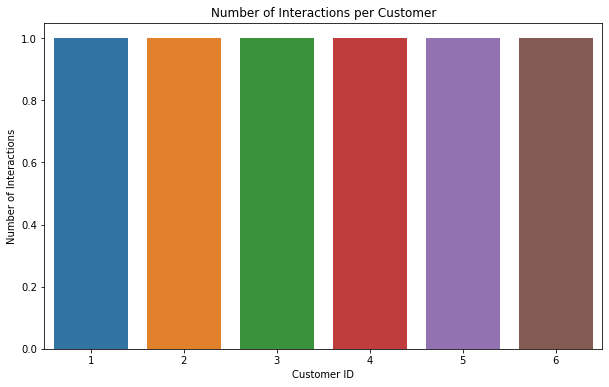

In [6]:
# Plot: Interactions per Customer
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_id', data=df_interactions)
plt.title('Number of Interactions per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Interactions')
plt.show()

In [7]:
# EDA: Total purchase amount per customer
total_purchase_per_customer = df_sales.groupby('customer_id')['purchase_amount'].sum().reset_index()
print("\nTotal Purchase Amount per Customer:")
print(tabulate(total_purchase_per_customer, headers='keys', tablefmt='grid'))



Total Purchase Amount per Customer:
+----+---------------+-------------------+
|    |   customer_id |   purchase_amount |
+====+===============+===================+
|  0 |             1 |               100 |
+----+---------------+-------------------+
|  1 |             2 |               150 |
+----+---------------+-------------------+
|  2 |             3 |               200 |
+----+---------------+-------------------+
|  3 |             4 |               250 |
+----+---------------+-------------------+
|  4 |             5 |               300 |
+----+---------------+-------------------+
|  5 |             6 |               350 |
+----+---------------+-------------------+


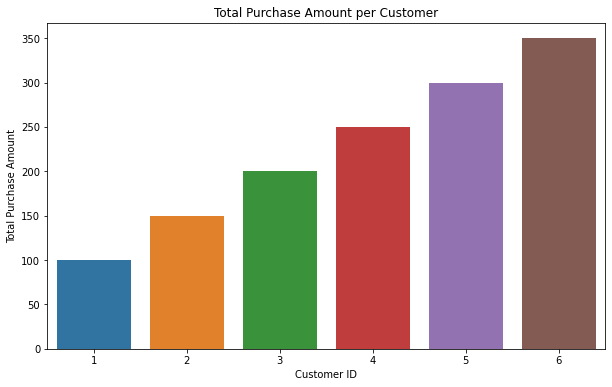

In [8]:
# Plot: Total Purchase Amount per Customer
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='purchase_amount', data=total_purchase_per_customer)
plt.title('Total Purchase Amount per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.show()

The image is a bar chart that shows the Total Purchase Amount per Customer. The x-axis represents the Customer ID (1 through 6), and the y-axis represents the Total Purchase Amount. The bars show a clear upward trend, indicating that Customer 6 has the highest total purchase amount, followed by Customer 5, while Customer 1 has the lowest total purchase amount.

This visualization helps identify the top-spending customers, which can be useful for customer segmentation and targeting in marketing campaigns. If you would like any specific modifications or further analysis based on this chart, let me know!

In [9]:
# Close connection
conn.close()

### 2. Inventory Management EDA

In [10]:
# Connect to SQLite database
conn = sqlite3.connect('inventory.db')

In [11]:
# Load data
df_inventory = pd.read_sql_query("SELECT * FROM Inventory", conn)
df_orders = pd.read_sql_query("SELECT * FROM Orders", conn)
df_sales = pd.read_sql_query("SELECT * FROM Sales", conn)

In [12]:
# EDA: Stock levels
print("\nStock Levels:")
print(tabulate(df_inventory[['product_name', 'stock_quantity']], headers='keys', tablefmt='grid'))



Stock Levels:
+----+----------------+------------------+
|    | product_name   |   stock_quantity |
+====+================+==================+
|  0 | Widget A       |              100 |
+----+----------------+------------------+
|  1 | Widget B       |              200 |
+----+----------------+------------------+
|  2 | Widget C       |              300 |
+----+----------------+------------------+
|  3 | Widget D       |              150 |
+----+----------------+------------------+
|  4 | Widget E       |              250 |
+----+----------------+------------------+
|  5 | Widget F       |              350 |
+----+----------------+------------------+


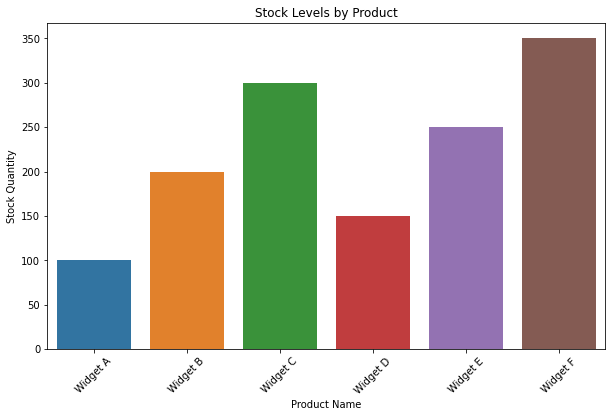

In [13]:
# Plot: Stock Levels
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='stock_quantity', data=df_inventory)
plt.title('Stock Levels by Product')
plt.xlabel('Product Name')
plt.ylabel('Stock Quantity')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the Stock Levels by Product. The x-axis represents the Product Name (Widget A through Widget F), and the y-axis represents the Stock Quantity.

Here are some key observations:

- Widget F has the highest stock quantity, followed closely by Widget C.
- Widget A has the lowest stock quantity.
- Widget D also has relatively low stock compared to the other products.
This visualization is helpful for inventory management, allowing the business to see which products are in surplus and which may need to be restocked soon. Let me know if you'd like any further analysis or modifications!

In [14]:
# EDA: Total sales per product
total_sales_per_product = df_sales.groupby('product_id')['quantity_sold'].sum().reset_index()
total_sales_per_product = total_sales_per_product.merge(df_inventory[['product_id', 'product_name']], on='product_id')
print("\nTotal Sales per Product:")
print(tabulate(total_sales_per_product[['product_name', 'quantity_sold']], headers='keys', tablefmt='grid'))



Total Sales per Product:
+----+----------------+-----------------+
|    | product_name   |   quantity_sold |
+====+================+=================+
|  0 | Widget A       |              10 |
+----+----------------+-----------------+
|  1 | Widget B       |              20 |
+----+----------------+-----------------+
|  2 | Widget C       |              30 |
+----+----------------+-----------------+
|  3 | Widget D       |              40 |
+----+----------------+-----------------+
|  4 | Widget E       |              25 |
+----+----------------+-----------------+
|  5 | Widget F       |              35 |
+----+----------------+-----------------+


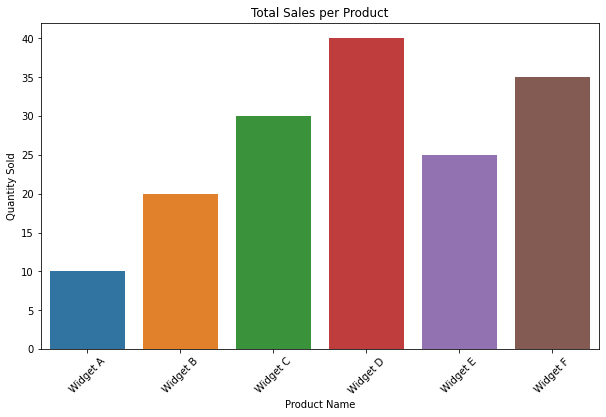

In [15]:
# Plot: Total Sales per Product
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='quantity_sold', data=total_sales_per_product)
plt.title('Total Sales per Product')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the Quantity Sold by Product. The x-axis represents the Product Name (Widget A through Widget F), and the y-axis represents the Quantity Sold.

#### Key insights from the chart:

- Widget D has the highest quantity sold, followed closely by Widget F and Widget C.
- Widget A has the lowest quantity sold.
- There is a fairly even distribution of sales across Widgets B, E, and A, with A being the lowest.
  
This chart is useful for analyzing sales performance and identifying the best-selling products. It can help in making decisions about production, inventory replenishment, or promotional strategies. Let me know if you'd like further analysis or any modifications!

### 3. Financial Reporting EDA

In [18]:
# Connect to SQLite database
conn = sqlite3.connect('finance.db')

In [19]:
# Load data
df_financials = pd.read_sql_query("SELECT * FROM Financials", conn)
df_balance_sheet = pd.read_sql_query("SELECT * FROM BalanceSheet", conn)
df_cash_flow = pd.read_sql_query("SELECT * FROM CashFlow", conn)

In [ ]:
# Display data
print("Financials:")
print(tabulate(df_financials, headers='keys', tablefmt='grid'))
print("\nBalance Sheet:")
print(tabulate(df_balance_sheet, headers='keys', tablefmt='grid'))
print("\nCash Flow:")
print(tabulate(df_cash_flow, headers='keys', tablefmt='grid'))

In [21]:
# EDA: Revenue vs Expenses
print("\nRevenue vs Expenses:")
print(tabulate(df_financials[['report_date', 'revenue', 'expenses']], headers='keys', tablefmt='grid'))



Revenue vs Expenses:
+----+---------------+-----------+------------+
|    | report_date   |   revenue |   expenses |
+====+===============+===========+============+
|  0 | 2023-01-01    |     10000 |       5000 |
+----+---------------+-----------+------------+
|  1 | 2023-02-01    |     15000 |       7000 |
+----+---------------+-----------+------------+
|  2 | 2023-03-01    |     20000 |      10000 |
+----+---------------+-----------+------------+
|  3 | 2023-04-01    |     25000 |      12000 |
+----+---------------+-----------+------------+
|  4 | 2023-05-01    |     30000 |      15000 |
+----+---------------+-----------+------------+
|  5 | 2023-06-01    |     35000 |      17000 |
+----+---------------+-----------+------------+


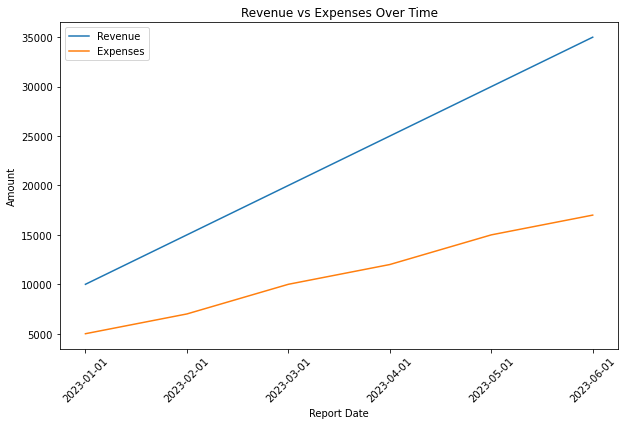

In [22]:
# Plot: Revenue vs Expenses
plt.figure(figsize=(10, 6))
plt.plot(df_financials['report_date'], df_financials['revenue'], label='Revenue')
plt.plot(df_financials['report_date'], df_financials['expenses'], label='Expenses')
plt.title('Revenue vs Expenses Over Time')
plt.xlabel('Report Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The line chart shows the Revenue vs Expenses Over Time. The x-axis represents the Report Date (from January 2023 to June 2023), and the y-axis represents the Amount.

Key observations:

Revenue (blue line) is consistently higher than Expenses (orange line) over the given time period.
Both revenue and expenses are increasing over time, with revenue growing at a steeper rate compared to expenses.
This indicates healthy business growth, as revenue is increasing faster than expenses, leading to greater profitability.
This chart is helpful for financial analysis, giving insights into the company's financial health over time. It shows that the company is maintaining control over its expenses while boosting its revenue. Let me know if you'd like further insights or adjustments!

In [23]:
# EDA: Net Income Over Time
print("\nNet Income Over Time:")
print(tabulate(df_financials[['report_date', 'net_income']], headers='keys', tablefmt='grid'))



Net Income Over Time:
+----+---------------+--------------+
|    | report_date   |   net_income |
+====+===============+==============+
|  0 | 2023-01-01    |         5000 |
+----+---------------+--------------+
|  1 | 2023-02-01    |         8000 |
+----+---------------+--------------+
|  2 | 2023-03-01    |        10000 |
+----+---------------+--------------+
|  3 | 2023-04-01    |        13000 |
+----+---------------+--------------+
|  4 | 2023-05-01    |        15000 |
+----+---------------+--------------+
|  5 | 2023-06-01    |        18000 |
+----+---------------+--------------+


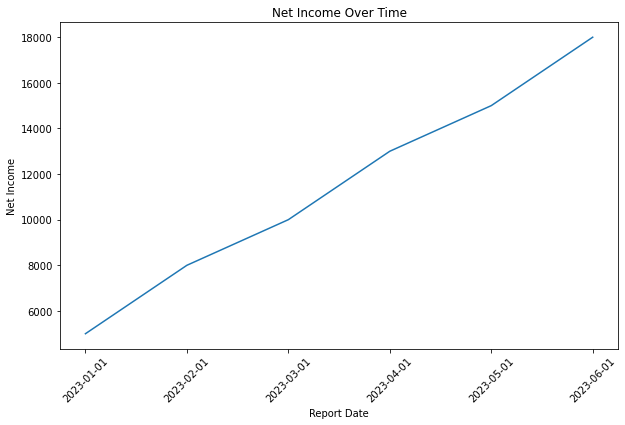

In [25]:
# Plot: Net Income Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='report_date', y='net_income', data=df_financials)
plt.title('Net Income Over Time')
plt.xlabel('Report Date')
plt.ylabel('Net Income')
plt.xticks(rotation=45)
plt.show()

# Close connection
conn.close()

This image is a line chart showing Net Income Over Time. The x-axis represents the Report Date (from January 2023 to June 2023), and the y-axis represents the Net Income.

#### Key observations:

Net income is steadily increasing over time, showing a consistent upward trend.
From January 2023 to June 2023, the net income has nearly tripled, indicating strong financial growth.
This indicates effective management of revenue and expenses, as the company has been able to increase profitability each month.
This chart provides valuable insights into the company's overall financial performance, highlighting increasing profitability over time. If you'd like further analysis or a different perspective, let me know

## 4. Human Resources Management EDA

In [26]:
# Connect to SQLite database
conn = sqlite3.connect('hr.db')

In [27]:
# Load data
df_employees = pd.read_sql_query("SELECT * FROM Employees", conn)
df_payroll = pd.read_sql_query("SELECT * FROM Payroll", conn)
df_performance_reviews = pd.read_sql_query("SELECT * FROM PerformanceReviews", conn)
df_training = pd.read_sql_query("SELECT * FROM Training", conn)


In [ ]:
# Display data
print("Employees:")
print(tabulate(df_employees, headers='keys', tablefmt='grid'))
print("\nPayroll:")
print(tabulate(df_payroll, headers='keys', tablefmt='grid'))
print("\nPerformance Reviews:")
print(tabulate(df_performance_reviews, headers='keys', tablefmt='grid'))
print("\nTraining:")
print(tabulate(df_training, headers='keys', tablefmt='grid'))

In [29]:
# EDA: Salary Distribution
print("\nSalary Distribution:")
print(tabulate(df_employees[['first_name', 'last_name', 'salary']], headers='keys', tablefmt='grid'))



Salary Distribution:
+----+--------------+-------------+----------+
|    | first_name   | last_name   |   salary |
+====+==============+=============+==========+
|  0 | John         | Doe         |    60000 |
+----+--------------+-------------+----------+
|  1 | Jane         | Smith       |    80000 |
+----+--------------+-------------+----------+
|  2 | Alice        | Johnson     |    70000 |
+----+--------------+-------------+----------+
|  3 | Bob          | Williams    |    50000 |
+----+--------------+-------------+----------+
|  4 | Charlie      | Brown       |    45000 |
+----+--------------+-------------+----------+
|  5 | Dana         | White       |    75000 |
+----+--------------+-------------+----------+


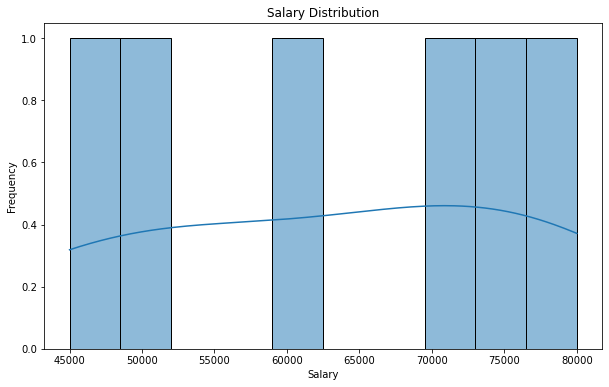

In [30]:
# Plot: Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_employees['salary'], bins=10, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The image is a histogram with a density curve that represents the Salary Distribution of employees. The x-axis shows the Salary range (from 45,000 to 80,000), and the y-axis shows the Frequency of employees within each salary range.

### Key observations:

The salary distribution is somewhat uniform, with distinct salary brackets at 45,000, 60,000, and 80,000.
The number of employees is evenly distributed across these salary brackets, with no one salary range dominating the others.
The density curve suggests a slight increase in frequency between 60,000 and 70,000, but overall, the distribution is fairly balanced.
This chart provides insights into how employee salaries are structured across the company. The distribution can help identify patterns in compensation, such as clusters around certain salary ranges. Let me know if you'd like any further analysis!


In [31]:
# EDA: Performance Ratings
performance_ratings = df_performance_reviews['performance_rating'].value_counts().reset_index()
performance_ratings.columns = ['rating', 'count']
print("\nPerformance Ratings:")
print(tabulate(performance_ratings, headers='keys', tablefmt='grid'))



Performance Ratings:
+----+----------+---------+
|    |   rating |   count |
+====+==========+=========+
|  0 |        4 |       2 |
+----+----------+---------+
|  1 |        5 |       2 |
+----+----------+---------+
|  2 |        3 |       2 |
+----+----------+---------+


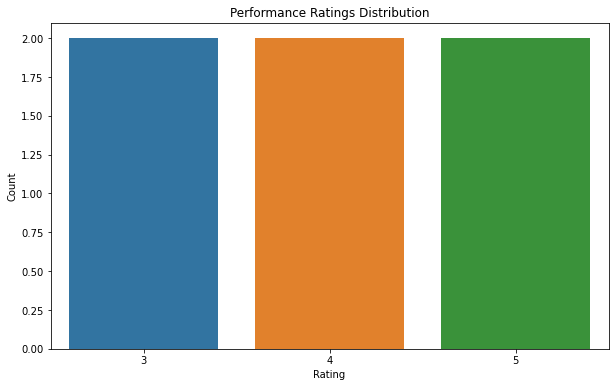

In [33]:
# Plot: Performance Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', data=performance_ratings)
plt.title('Performance Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Close connection
conn.close()

In [34]:
# Connect to SQLite database
conn = sqlite3.connect('analytics.db')

In [35]:
# Load data
df_website_visits = pd.read_sql_query("SELECT * FROM WebsiteVisits", conn)
df_user_behavior = pd.read_sql_query("SELECT * FROM UserBehavior", conn)
df_campaigns = pd.read_sql_query("SELECT * FROM Campaigns", conn)
df_page_visits = pd.read_sql_query("SELECT * FROM PageVisits", conn)

In [36]:
# Display data
print("Website Visits:")
print(tabulate(df_website_visits, headers='keys', tablefmt='grid'))
print("\nUser Behavior:")
print(tabulate(df_user_behavior, headers='keys', tablefmt='grid'))
print("\nCampaigns:")
print(tabulate(df_campaigns, headers='keys', tablefmt='grid'))
print("\nPage Visits:")
print(tabulate(df_page_visits, headers='keys', tablefmt='grid'))

Website Visits:
+----+------------+--------------+-----------+---------------+--------------------+------------+
|    |   visit_id | visit_date   |   user_id | page_viewed   |   session_duration | referrer   |
+====+============+==============+===========+===============+====================+============+
|  0 |          1 | 2023-01-01   |         1 | Home          |                120 | Google     |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  1 |          2 | 2023-01-01   |         2 | About         |                 90 | Facebook   |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  2 |          3 | 2023-01-02   |         3 | Contact       |                110 | Direct     |
+----+------------+--------------+-----------+---------------+--------------------+------------+
|  3 |          4 | 2023-01-03   |         4 | Services      |                 80 | Google     |
+----+--------

In [37]:
# EDA: Session Duration by Page
print("\nSession Duration by Page:")
print(tabulate(df_page_visits[['page', 'session_duration']], headers='keys', tablefmt='grid'))



Session Duration by Page:
+----+----------+--------------------+
|    | page     |   session_duration |
+====+==========+====================+
|  0 | Home     |                120 |
+----+----------+--------------------+
|  1 | About    |                 90 |
+----+----------+--------------------+
|  2 | Contact  |                110 |
+----+----------+--------------------+
|  3 | Services |                 80 |
+----+----------+--------------------+
|  4 | Blog     |                100 |
+----+----------+--------------------+
|  5 | Home     |                150 |
+----+----------+--------------------+


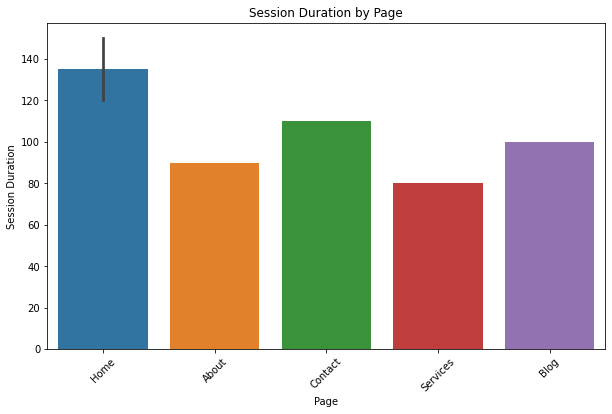

In [38]:
# Plot: Session Duration by Page
plt.figure(figsize=(10, 6))
sns.barplot(x='page', y='session_duration', data=df_page_visits)
plt.title('Session Duration by Page')
plt.xlabel('Page')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.show()

The image is a bar chart showing the Session Duration by Page. 
### Key observations:
The Home page has the highest average session duration, meaning users spend the most time on the homepage.
The Contact page also has a relatively high session duration, indicating users spend a significant amount of time here.
The Services page has the lowest session duration, meaning users may not spend much time exploring service offerings.
The About and Blog pages have moderate session durations.
This analysis helps in understanding user behavior on the website. Pages with longer session durations, such as the Home and Contact pages, likely provide more engaging or necessary content. This can help in optimizing content and improving the user experience on pages with shorter session durations, such as the Services page. Let me know if you'd like to explore further!

In [39]:
# EDA: Bounce Rate by Page
print("\nBounce Rate by Page:")
print(tabulate(df_page_visits[['page', 'bounce_rate']], headers='keys', tablefmt='grid'))



Bounce Rate by Page:
+----+----------+---------------+
|    | page     |   bounce_rate |
+====+==========+===============+
|  0 | Home     |          0.2  |
+----+----------+---------------+
|  1 | About    |          0.1  |
+----+----------+---------------+
|  2 | Contact  |          0.3  |
+----+----------+---------------+
|  3 | Services |          0.15 |
+----+----------+---------------+
|  4 | Blog     |          0.25 |
+----+----------+---------------+
|  5 | Home     |          0.05 |
+----+----------+---------------+


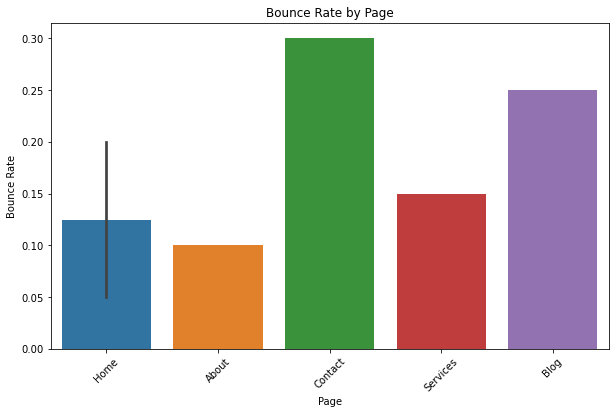

In [41]:
# Plot: Bounce Rate by Page
plt.figure(figsize=(10, 6))
sns.barplot(x='page', y='bounce_rate', data=df_page_visits)
plt.title('Bounce Rate by Page')
plt.xlabel('Page')
plt.ylabel('Bounce Rate')
plt.xticks(rotation=45)
plt.show()

# Close connection
conn.close()

The image is a bar chart showing the Bounce Rate by Page. 
### Key observations:
The Contact page has the highest bounce rate, indicating that many users leave the site quickly after viewing this page. This could be due to users finding the information they need or not being engaged enough to explore further.
- The Blog page also has a relatively high bounce rate, suggesting that users might not engage deeply with the blog content.
- The About and Services pages have the lowest bounce rates, meaning users are more likely to explore further after visiting these pages.
- The Home page has a moderate bounce rate, which is typical as it’s often a landing page.
  
High bounce rates on specific pages could indicate issues with user engagement or page content. It might be helpful to analyze why users are leaving the Contact and Blog pages and make adjustments to improve engagement. Let me know if you want to explore further or need suggestions for optimization!

# Scenario 1: Identify the customers who have interacted the most with the company.

In [43]:
import sqlite3
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Connect to SQLite database
conn = sqlite3.connect('crm.db')

In [45]:
query1 = pd.read_sql_query('''
SELECT customer_id, COUNT(*) AS interaction_count
FROM Interactions
GROUP BY customer_id
ORDER BY interaction_count DESC;
''', conn)
print("\nCustomers with the Most Interactions:")
print(tabulate(query1, headers='keys', tablefmt='grid'))


Customers with the Most Interactions:
+----+---------------+---------------------+
|    |   customer_id |   interaction_count |
+====+===============+=====================+
|  0 |             6 |                   1 |
+----+---------------+---------------------+
|  1 |             5 |                   1 |
+----+---------------+---------------------+
|  2 |             4 |                   1 |
+----+---------------+---------------------+
|  3 |             3 |                   1 |
+----+---------------+---------------------+
|  4 |             2 |                   1 |
+----+---------------+---------------------+
|  5 |             1 |                   1 |
+----+---------------+---------------------+


# Scenario 2: Find the total sales amount for each customer.

In [46]:
query2 = pd.read_sql_query('''
SELECT customer_id, SUM(purchase_amount) AS total_sales
FROM Sales
GROUP BY customer_id
ORDER BY total_sales DESC;
''', conn)
print("\nTotal Sales Amount per Customer:")
print(tabulate(query2, headers='keys', tablefmt='grid'))


Total Sales Amount per Customer:
+----+---------------+---------------+
|    |   customer_id |   total_sales |
+====+===============+===============+
|  0 |             6 |           350 |
+----+---------------+---------------+
|  1 |             5 |           300 |
+----+---------------+---------------+
|  2 |             4 |           250 |
+----+---------------+---------------+
|  3 |             3 |           200 |
+----+---------------+---------------+
|  4 |             2 |           150 |
+----+---------------+---------------+
|  5 |             1 |           100 |
+----+---------------+---------------+


# Scenario 3: List customers who have not made any purchases.


In [47]:
query3 = pd.read_sql_query('''
SELECT c.customer_id, c.first_name, c.last_name
FROM Customers c
LEFT JOIN Sales s ON c.customer_id = s.customer_id
WHERE s.customer_id IS NULL;
''', conn)
print("\nCustomers Who Have Not Made Any Purchases:")
print(tabulate(query3, headers='keys', tablefmt='grid'))


Customers Who Have Not Made Any Purchases:
+---------------+--------------+-------------+
| customer_id   | first_name   | last_name   |
+===============+==============+=============+
+---------------+--------------+-------------+


# Scenario 4: Determine the average number of interactions per customer.

In [48]:
query4 = pd.read_sql_query('''
SELECT AVG(interaction_count) AS avg_interactions
FROM (
    SELECT customer_id, COUNT(*) AS interaction_count
    FROM Interactions
    GROUP BY customer_id
) AS subquery;
''', conn)
print("\nAverage Number of Interactions per Customer:")
print(tabulate(query4, headers='keys', tablefmt='grid'))


Average Number of Interactions per Customer:
+----+--------------------+
|    |   avg_interactions |
+====+====================+
|  0 |                  1 |
+----+--------------------+


# Scenario 5: Identify the top 5 customers with the highest total purchase amount.

In [49]:
query5 = pd.read_sql_query('''
SELECT customer_id, SUM(purchase_amount) AS total_sales
FROM Sales
GROUP BY customer_id
ORDER BY total_sales DESC
LIMIT 5;
''', conn)
print("\nTop 5 Customers by Total Purchase Amount:")
print(tabulate(query5, headers='keys', tablefmt='grid'))

# Close connection
conn.close()


Top 5 Customers by Total Purchase Amount:
+----+---------------+---------------+
|    |   customer_id |   total_sales |
+====+===============+===============+
|  0 |             6 |           350 |
+----+---------------+---------------+
|  1 |             5 |           300 |
+----+---------------+---------------+
|  2 |             4 |           250 |
+----+---------------+---------------+
|  3 |             3 |           200 |
+----+---------------+---------------+
|  4 |             2 |           150 |
+----+---------------+---------------+


# 2. Inventory Management EDA

In [50]:
# Connect to SQLite database
conn = sqlite3.connect('inventory.db')

In [51]:
# Load data
df_inventory = pd.read_sql_query("SELECT * FROM Inventory", conn)
df_orders = pd.read_sql_query("SELECT * FROM Orders", conn)
df_sales = pd.read_sql_query("SELECT * FROM Sales", conn)

# Scenario 1: Find products that are low in stock (less than 10 units).

In [52]:
query1 = pd.read_sql_query('''
SELECT product_name, stock_quantity
FROM Inventory
WHERE stock_quantity < 10;
''', conn)
print("\nProducts Low in Stock:")
print(tabulate(query1, headers='keys', tablefmt='grid'))


Products Low in Stock:
+----------------+------------------+
| product_name   | stock_quantity   |
+================+==================+
+----------------+------------------+


# Scenario 2: Calculate the total value of current inventory.

In [ ]:

# Scenario 2: Calculate the total value of current inventory.
query2 = pd.read_sql_query('''
SELECT SUM(stock_quantity * unit_price) AS total_inventory_value
FROM Inventory;
''', conn)
print("\nTotal Value of Current Inventory:")
print(tabulate(query2, headers='keys', tablefmt='grid'))

# Scenario 3: List the top 3 best-selling products.

In [56]:

query3 = pd.read_sql_query('''
SELECT i.product_name, SUM(s.quantity_sold) AS total_sold
FROM Sales s
JOIN Inventory i ON s.product_id = i.product_id
GROUP BY s.product_id, i.product_name
ORDER BY total_sold DESC
LIMIT 3;
''', conn)
print("\nTop 3 Best-Selling Products:")
print(tabulate(query3, headers='keys', tablefmt='grid'))


Top 3 Best-Selling Products:
+----+----------------+--------------+
|    | product_name   |   total_sold |
+====+================+==============+
|  0 | Widget D       |           40 |
+----+----------------+--------------+
|  1 | Widget F       |           35 |
+----+----------------+--------------+
|  2 | Widget C       |           30 |
+----+----------------+--------------+


# Scenario 4: Identify products that have never been sold.

In [57]:
query4 = pd.read_sql_query('''
SELECT product_id, product_name
FROM Inventory
WHERE product_id NOT IN (SELECT DISTINCT product_id FROM Sales);
''', conn)
print("\nProducts That Have Never Been Sold:")
print(tabulate(query4, headers='keys', tablefmt='grid'))


Products That Have Never Been Sold:
+--------------+----------------+
| product_id   | product_name   |
+==============+================+
+--------------+----------------+


# Scenario 5: Find the total number of orders and their status.

In [58]:
query5 = pd.read_sql_query('''
SELECT order_status, COUNT(*) AS total_orders
FROM Orders
GROUP BY order_status;
''', conn)
print("\nTotal Number of Orders by Status:")
print(tabulate(query5, headers='keys', tablefmt='grid'))


# Close connection
conn.close()


Total Number of Orders by Status:
+----+----------------+----------------+
|    | order_status   |   total_orders |
+====+================+================+
|  0 | Completed      |              3 |
+----+----------------+----------------+
|  1 | Pending        |              3 |
+----+----------------+----------------+


## 3. Financial Reporting EDA

In [59]:
# Connect to SQLite database
conn = sqlite3.connect('finance.db')

In [60]:
# Load data
df_financials = pd.read_sql_query("SELECT * FROM Financials", conn)
df_balance_sheet = pd.read_sql_query("SELECT * FROM BalanceSheet", conn)
df_cash_flow = pd.read_sql_query("SELECT * FROM CashFlow", conn)

### Scenario 1: Calculate the net income for each month.

In [61]:
query1 = pd.read_sql_query('''
SELECT report_date, revenue - expenses AS net_income
FROM Financials;
''', conn)
print("\nNet Income for Each Month:")
print(tabulate(query1, headers='keys', tablefmt='grid'))


Net Income for Each Month:
+----+---------------+--------------+
|    | report_date   |   net_income |
+====+===============+==============+
|  0 | 2023-01-01    |         5000 |
+----+---------------+--------------+
|  1 | 2023-02-01    |         8000 |
+----+---------------+--------------+
|  2 | 2023-03-01    |        10000 |
+----+---------------+--------------+
|  3 | 2023-04-01    |        13000 |
+----+---------------+--------------+
|  4 | 2023-05-01    |        15000 |
+----+---------------+--------------+
|  5 | 2023-06-01    |        18000 |
+----+---------------+--------------+


## Scenario 2: Determine the total assets, liabilities, and equity for the latest balance sheet report.

In [62]:
query2 = pd.read_sql_query('''
SELECT report_date, assets, liabilities, equity
FROM BalanceSheet
ORDER BY report_date DESC
LIMIT 1;
''', conn)
print("\nLatest Balance Sheet Report:")
print(tabulate(query2, headers='keys', tablefmt='grid'))


Latest Balance Sheet Report:
+----+---------------+----------+---------------+----------+
|    | report_date   |   assets |   liabilities |   equity |
+====+===============+==========+===============+==========+
|  0 | 2023-06-01    |   100000 |         45000 |    55000 |
+----+---------------+----------+---------------+----------+


# Scenario 3: Identify the month with the highest revenue

In [63]:
query3 = pd.read_sql_query('''
SELECT report_date, revenue
FROM Financials
ORDER BY revenue DESC
LIMIT 1;
''', conn)
print("\nMonth with the Highest Revenue:")
print(tabulate(query3, headers='keys', tablefmt='grid'))


Month with the Highest Revenue:
+----+---------------+-----------+
|    | report_date   |   revenue |
+====+===============+===========+
|  0 | 2023-06-01    |     35000 |
+----+---------------+-----------+


## Scenario 4: Calculate the total cash inflow and outflow.

In [64]:
query4 = pd.read_sql_query('''
SELECT transaction_type, SUM(amount) AS total_amount
FROM CashFlow
GROUP BY transaction_type;
''', conn)
print("\nTotal Cash Inflow and Outflow:")
print(tabulate(query4, headers='keys', tablefmt='grid'))


Total Cash Inflow and Outflow:
+----+--------------------+----------------+
|    | transaction_type   |   total_amount |
+====+====================+================+
|  0 | Inflow             |           4500 |
+----+--------------------+----------------+
|  1 | Outflow            |           2200 |
+----+--------------------+----------------+


# Scenario 5: Compare the budgeted vs. actual expenses for each financial period.

In [ ]:
query5 = pd.read_sql_query('''
SELECT f.report_date, b.budgeted_amount, f.expenses, (f.expenses - b.budgeted_amount) AS variance
FROM Financials f
JOIN Budget b ON f.report_date = b.report_date
WHERE f.expenses IS NOT NULL;
''', conn)
print("\nBudgeted vs. Actual Expenses:")
print(tabulate(query5, headers='keys', tablefmt='grid'))

# Close connection
conn.close()

# 4. Human Resources Management EDA

In [69]:
# Connect to SQLite database
conn = sqlite3.connect('hr.db')

In [70]:
# Load data
df_employees = pd.read_sql_query("SELECT * FROM Employees", conn)
df_payroll = pd.read_sql_query("SELECT * FROM Payroll", conn)
df_performance_reviews = pd.read_sql_query("SELECT * FROM PerformanceReviews", conn)
df_training = pd.read_sql_query("SELECT * FROM Training", conn)

# Scenario 1: List employees and their respective departments.

In [71]:
# SQL Queries for Scenarios
query1 = pd.read_sql_query('''
SELECT first_name, last_name, department
FROM Employees
ORDER BY department;
''', conn)
print("\nEmployees and Their Departments:")
print(tabulate(query1, headers='keys', tablefmt='grid'))


Employees and Their Departments:
+----+--------------+-------------+--------------+
|    | first_name   | last_name   | department   |
+====+==============+=============+==============+
|  0 | Alice        | Johnson     | Finance      |
+----+--------------+-------------+--------------+
|  1 | John         | Doe         | HR           |
+----+--------------+-------------+--------------+
|  2 | Jane         | Smith       | IT           |
+----+--------------+-------------+--------------+
|  3 | Dana         | White       | IT           |
+----+--------------+-------------+--------------+
|  4 | Bob          | Williams    | Marketing    |
+----+--------------+-------------+--------------+
|  5 | Charlie      | Brown       | Sales        |
+----+--------------+-------------+--------------+


# Scenario 2: Calculate the average salary in each department.

In [72]:

query2 = pd.read_sql_query('''
SELECT department, AVG(salary) AS average_salary
FROM Employees
GROUP BY department;
''', conn)
print("\nAverage Salary in Each Department:")
print(tabulate(query2, headers='keys', tablefmt='grid'))


Average Salary in Each Department:
+----+--------------+------------------+
|    | department   |   average_salary |
+====+==============+==================+
|  0 | Finance      |            70000 |
+----+--------------+------------------+
|  1 | HR           |            60000 |
+----+--------------+------------------+
|  2 | IT           |            77500 |
+----+--------------+------------------+
|  3 | Marketing    |            50000 |
+----+--------------+------------------+
|  4 | Sales        |            45000 |
+----+--------------+------------------+


# Scenario 3: Identify employees with salaries above the company average.

In [73]:
query3 = pd.read_sql_query('''
SELECT first_name, last_name, salary
FROM Employees
WHERE salary > (SELECT AVG(salary) FROM Employees);
''', conn)
print("\nEmployees with Salaries Above the Company Average:")
print(tabulate(query3, headers='keys', tablefmt='grid'))


Employees with Salaries Above the Company Average:
+----+--------------+-------------+----------+
|    | first_name   | last_name   |   salary |
+====+==============+=============+==========+
|  0 | Jane         | Smith       |    80000 |
+----+--------------+-------------+----------+
|  1 | Alice        | Johnson     |    70000 |
+----+--------------+-------------+----------+
|  2 | Dana         | White       |    75000 |
+----+--------------+-------------+----------+


## Scenario 4: Find employees who have completed specific training programs.

In [74]:
query4 = pd.read_sql_query('''
SELECT e.first_name, e.last_name, t.training_program
FROM Employees e
JOIN Training t ON e.employee_id = t.employee_id
WHERE t.completion_status = 'Completed';
''', conn)
print("\nEmployees Who Have Completed Specific Training Programs:")
print(tabulate(query4, headers='keys', tablefmt='grid'))


Employees Who Have Completed Specific Training Programs:
+----+--------------+-------------+---------------------+
|    | first_name   | last_name   | training_program    |
+====+==============+=============+=====================+
|  0 | John         | Doe         | Leadership Training |
+----+--------------+-------------+---------------------+
|  1 | Jane         | Smith       | Advanced Python     |
+----+--------------+-------------+---------------------+
|  2 | Bob          | Williams    | Digital Marketing   |
+----+--------------+-------------+---------------------+
|  3 | Charlie      | Brown       | Sales Techniques    |
+----+--------------+-------------+---------------------+


# Scenario 5: Determine the highest performance rating received by each employee.


In [75]:
query5 = pd.read_sql_query('''
SELECT employee_id, MAX(performance_rating) AS highest_rating
FROM PerformanceReviews
GROUP BY employee_id;
''', conn)
print("\nHighest Performance Rating Received by Each Employee:")
print(tabulate(query5, headers='keys', tablefmt='grid'))

# Close connection
conn.close()


Highest Performance Rating Received by Each Employee:
+----+---------------+------------------+
|    |   employee_id |   highest_rating |
+====+===============+==================+
|  0 |             1 |                4 |
+----+---------------+------------------+
|  1 |             2 |                5 |
+----+---------------+------------------+
|  2 |             3 |                3 |
+----+---------------+------------------+
|  3 |             4 |                4 |
+----+---------------+------------------+
|  4 |             5 |                3 |
+----+---------------+------------------+
|  5 |             6 |                5 |
+----+---------------+------------------+


# 5. Website Analytics EDA

In [76]:
# Connect to SQLite database
conn = sqlite3.connect('analytics.db')

# Scenario 1: Identify the most visited pages on the website

In [77]:
query1 = pd.read_sql_query('''
SELECT page_viewed, COUNT(*) AS visit_count
FROM WebsiteVisits
GROUP BY page_viewed
ORDER BY visit_count DESC;
''', conn)
print("\nMost Visited Pages:")
print(tabulate(query1, headers='keys', tablefmt='grid'))


Most Visited Pages:
+----+---------------+---------------+
|    | page_viewed   |   visit_count |
+====+===============+===============+
|  0 | Home          |             2 |
+----+---------------+---------------+
|  1 | Services      |             1 |
+----+---------------+---------------+
|  2 | Contact       |             1 |
+----+---------------+---------------+
|  3 | Blog          |             1 |
+----+---------------+---------------+
|  4 | About         |             1 |
+----+---------------+---------------+


### Scenario 2: Calculate the average session duration for each page.

In [78]:
query2 = pd.read_sql_query('''
SELECT page, AVG(session_duration) AS avg_session_duration
FROM PageVisits
GROUP BY page;
''', conn)
print("\nAverage Session Duration for Each Page:")
print(tabulate(query2, headers='keys', tablefmt='grid'))


Average Session Duration for Each Page:
+----+----------+------------------------+
|    | page     |   avg_session_duration |
+====+==========+========================+
|  0 | About    |                     90 |
+----+----------+------------------------+
|  1 | Blog     |                    100 |
+----+----------+------------------------+
|  2 | Contact  |                    110 |
+----+----------+------------------------+
|  3 | Home     |                    135 |
+----+----------+------------------------+
|  4 | Services |                     80 |
+----+----------+------------------------+


## Scenario 3: Find the conversion rate for each marketing campaign.

In [80]:
query3 = pd.read_sql_query('''
SELECT campaign_name, (SUM(converted) * 1.0 / COUNT(*)) AS conversion_rate
FROM Campaigns
GROUP BY campaign_name;
''', conn)
print("\nConversion Rate for Each Marketing Campaign:")
print(tabulate(query3, headers='keys', tablefmt='grid'))


Conversion Rate for Each Marketing Campaign:
+----+-----------------+-------------------+
|    | campaign_name   |   conversion_rate |
+====+=================+===================+
|  0 | Campaign 1      |                 1 |
+----+-----------------+-------------------+
|  1 | Campaign 2      |                 0 |
+----+-----------------+-------------------+
|  2 | Campaign 3      |                 1 |
+----+-----------------+-------------------+
|  3 | Campaign 4      |                 0 |
+----+-----------------+-------------------+
|  4 | Campaign 5      |                 1 |
+----+-----------------+-------------------+
|  5 | Campaign 6      |                 0 |
+----+-----------------+-------------------+


### Scenario 4: Determine the bounce rate for each page.

In [81]:
query4 = pd.read_sql_query('''
SELECT page, (SUM(CASE WHEN session_duration < 30 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) AS bounce_rate
FROM PageVisits
GROUP BY page;
''', conn)
print("\nBounce Rate for Each Page:")
print(tabulate(query4, headers='keys', tablefmt='grid'))


Bounce Rate for Each Page:
+----+----------+---------------+
|    | page     |   bounce_rate |
+====+==========+===============+
|  0 | About    |             0 |
+----+----------+---------------+
|  1 | Blog     |             0 |
+----+----------+---------------+
|  2 | Contact  |             0 |
+----+----------+---------------+
|  3 | Home     |             0 |
+----+----------+---------------+
|  4 | Services |             0 |
+----+----------+---------------+


### Scenario 5: List the top referrers bringing traffic to the website.

In [83]:
query5 = pd.read_sql_query('''
SELECT referrer, COUNT(*) AS visit_count
FROM WebsiteVisits
GROUP BY referrer
ORDER BY visit_count DESC;
''', conn)
print("\nTop Referrers Bringing Traffic to the Website:")
print(tabulate(query5, headers='keys', tablefmt='grid'))

# Close connection
conn.close()


Top Referrers Bringing Traffic to the Website:
+----+------------+---------------+
|    | referrer   |   visit_count |
+====+============+===============+
|  0 | Google     |             2 |
+----+------------+---------------+
|  1 | Twitter    |             1 |
+----+------------+---------------+
|  2 | LinkedIn   |             1 |
+----+------------+---------------+
|  3 | Facebook   |             1 |
+----+------------+---------------+
|  4 | Direct     |             1 |
+----+------------+---------------+


### Conclusion
This project demonstrated how SQL, in combination with Python in a Jupyter Notebook, can be effectively used to manage, analyze, and visualize data for various business divisions within a fictional company, TechCorp. Throughout the project, we built databases for Customer Relationship Management (CRM), Inventory Management (IM), Financial Reporting (FR), Human Resources Management (HRM), and Website Analytics (WA), each comprising multiple tables. We then performed exploratory data analysis (EDA) to extract meaningful insights and addressed specific scenario-based questions relevant to each business division.

The followings are the key takeaways from each section:

- Customer Relationship Management (CRM):

We identified customers with the highest number of interactions and highest total purchase amounts, helping pinpoint top-performing customers.
Insights into customer behavior and interaction patterns can guide personalized marketing strategies.
- Inventory Management (IM):

We analyzed stock levels and sales data, identifying best-selling products and low-stock items. This is essential for ensuring efficient inventory management and avoiding stock shortages.
By monitoring product sales trends, businesses can make informed decisions regarding production and restocking.
- Financial Reporting (FR):

Analysis of revenue, expenses, and net income over time revealed positive financial growth for TechCorp, with revenue consistently outpacing expenses.
A comparison of budgeted vs. actual expenses helped track financial performance, highlighting variances that require attention.
Human Resources Management (HRM):

Salary distribution and performance review data provided insights into employee compensation and performance across different departments.
Identifying employees who completed specific training programs is valuable for tracking employee development and planning future training initiatives.
- Website Analytics (WA):

Session duration and bounce rate analysis helped assess user engagement across various website pages. High bounce rates on the Contact and Blog pages suggest opportunities for improving user retention and engagement.
Understanding how users interact with the website can lead to improvements in the user experience, helping increase engagement and conversion rates.
### Project Significance:
The ability to use SQL to manage and query databases, coupled with Python’s powerful visualization libraries, allows businesses to analyze their operations more effectively. By performing comprehensive data analysis, companies can make data-driven decisions, improve customer engagement, optimize inventory, track financial health, and ensure efficient resource management.

### Recommendations:
- Customer Segmentation: Use insights from CRM data to develop personalized marketing strategies for different customer segments based on their purchase behavior and interaction history.
- Inventory Management: Optimize stock replenishment and manage production based on the sales data and low-stock product identification to avoid stockouts and overproduction.
Financial Planning: Continue to track actual vs. budgeted expenses regularly to maintain financial discipline and adjust budgets when needed.
- HR Analytics: Enhance employee training programs by identifying skill gaps based on performance reviews and training completion data.
- Website Optimization: Investigate and address the reasons behind high bounce rates on the Contact and Blog pages to enhance user retention and overall site engagement.
  
This project demonstrated the value of SQL as a critical tool for business analytics and decision-making. By implementing similar data management and analysis processes, businesses can improve efficiency, optimize operations, and enhance overall performance.